In [1]:
# Let's do some necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import pandapower as pp
import pandapower.topology as top
import pandapower.plotting as plot
import simbench as sb

In [4]:
# dataFromPF = pd.read_csv("modified_data.csv")
# dataFromPF.drop(columns=['Unnamed: 0'], inplace=True)
# for i in dataFromPF.keys():
#     dataFromPF.rename(columns={i: i.split('\\')[-1]}, inplace=True)
dataFromPF = pd.read_csv("bus_voltages.csv")


In [5]:
dataFromPF.head()

,EHV Bus 1,EHV Bus 1034,EHV Bus 1141,EHV Bus 1143,EHV Bus 1195,EHV Bus 1203,EHV Bus 2,EHV Bus 101,EHV Bus 102,EHV Bus 1299,EHV Bus 1301,EHV Bus 1303,EHV Bus 1305,EHV Bus 1307,EHV Bus 1309,EHV Bus 1311,EHV Bus 1313,EHV Bus 904,EHV Bus 906,EHV Bus 103,EHV Bus 104,EHV Bus 1315,EHV Bus 1317,EHV Bus 105,EHV Bus 106,EHV Bus 1319,EHV Bus 1321,EHV Bus 1322,EHV Bus 1324,EHV Bus 107,EHV Bus 108,EHV Bus 1323,EHV Bus 1325,EHV Bus 1379,EHV Bus 1380,EHV Bus 734,EHV Bus 736,EHV Bus 109,EHV Bus 110,EHV Bus 1151,EHV Bus 1327,EHV Bus 1329,EHV Bus 567,EHV Bus 568,EHV Bus 935,EHV Bus 937,EHV Bus 1011,EHV Bus 1013,EHV Bus 11,EHV Bus 12,EHV Bus 1353,EHV Bus 1355,EHV Bus 111,EHV Bus 112,EHV Bus 1331,EHV Bus 1333,EHV Bus 1338,EHV Bus 1340,EHV Bus 113,EHV Bus 114,EHV Bus 1335,EHV Bus 1337,EHV Bus 1339,EHV Bus 1341,EHV Bus 925,EHV Bus 927,EHV Bus 115,EHV Bus 116,EHV Bus 1252,EHV Bus 1253,EHV Bus 1310,EHV Bus 1312,EHV Bus 1330,EHV Bus 1332,EHV Bus 908,EHV Bus 910,EHV Bus 117,EHV Bus 118,EHV Bus 569,EHV Bus 570,EHV Bus 812,EHV Bus 814,EHV Bus 1154,EHV Bus 119,EHV Bus 120,EHV Bus 1343,EHV Bus 1348,EHV Bus 1350,EHV Bus 571,EHV Bus 572,EHV Bus 121,EHV Bus 122,EHV Bus 1345,EHV Bus 1347,EHV Bus 573,EHV Bus 574,EHV Bus 738,EHV Bus 1187,EHV Bus 123,EHV Bus 124,EHV Bus 1342,EHV Bus 125,EHV Bus 126,EHV Bus 1349,EHV Bus 127,EHV Bus 128,EHV Bus 1351,EHV Bus 129,EHV Bus 130,EHV Bus 1401,EHV Bus 575,EHV Bus 576,EHV Bus 1124,EHV Bus 1298,EHV Bus 13,EHV Bus 14,EHV Bus 523,EHV Bus 524,EHV Bus 131,EHV Bus 132,EHV Bus 577,EHV Bus 578,EHV Bus 1284,EHV Bus 133,EHV Bus 134,EHV Bus 579,EHV Bus 580,EHV Bus 135,EHV Bus 1357,EHV Bus 1359,EHV Bus 136,EHV Bus 1360,EHV Bus 1362,EHV Bus 137,EHV Bus 138,EHV Bus 581,EHV Bus 582,EHV Bus 824,EHV Bus 1170,EHV Bus 1171,EHV Bus 1364,EHV Bus 139,EHV Bus 140,EHV Bus 583,EHV Bus 584,EHV Bus 1366,EHV Bus 1368,EHV Bus 141,EHV Bus 142,EHV Bus 1183,EHV Bus 1370,EHV Bus 143,EHV Bus 144,EHV Bus 3086,EHV Bus 3087,EHV Bus 1433,EHV Bus 1434,EHV Bus 2436,EHV Bus 2438,EHV Bus 1435,EHV Bus 1436,EHV Bus 2390,EHV Bus 2437,EHV Bus 2439,EHV Bus 2441,EHV Bus 2443,EHV Bus 2445,EHV Bus 2447,EHV Bus 2883,EHV Bus 2963,EHV Bus 1437,EHV Bus 1438,EHV Bus 1975,EHV Bus 1976,EHV Bus 2396,EHV Bus 2398,EHV Bus 2440,EHV Bus 2442,EHV Bus 2444,EHV Bus 2446,EHV Bus 1439,EHV Bus 1440,EHV Bus 1977,EHV Bus 1978,EHV Bus 2582,EHV Bus 2584,EHV Bus 2586,EHV Bus 2967,EHV Bus 2969,EHV Bus 1441,EHV Bus 1442,EHV Bus 2592,EHV Bus 2893,EHV Bus 2964,EHV Bus 2966,EHV Bus 2968,EHV Bus 2970,EHV Bus 1443,EHV Bus 1444,EHV Bus 1979,EHV Bus 1980,EHV Bus 2181,EHV Bus 2200,EHV Bus 2234,EHV Bus 2878,EHV Bus 2880,EHV Bus 2900,EHV Bus 1445,EHV Bus 1446,EHV Bus 2201,EHV Bus 2236,EHV Bus 1447,EHV Bus 1448,EHV Bus 1981,EHV Bus 1982,EHV Bus 2235,EHV Bus 2237,EHV Bus 2239,EHV Bus 2241,EHV Bus 2243,EHV Bus 2245,EHV Bus 1449,EHV Bus 1450,EHV Bus 1983,EHV Bus 1984,EHV Bus 2276,EHV Bus 2278,EHV Bus 2316,EHV Bus 2318,EHV Bus 2406,EHV Bus 2408,EHV Bus 1346,EHV Bus 1372,EHV Bus 145,EHV Bus 146,EHV Bus 1451,EHV Bus 1452,EHV Bus 2277,EHV Bus 2279,EHV Bus 2320,EHV Bus 2322,EHV Bus 2518,EHV Bus 2520,EHV Bus 2664,EHV Bus 1453,EHV Bus 1454,EHV Bus 1985,EHV Bus 1986,EHV Bus 2317,EHV Bus 2319,EHV Bus 2321,EHV Bus 2323,EHV Bus 2666,EHV Bus 1455,EHV Bus 1456,EHV Bus 1987,EHV Bus 1988,EHV Bus 2381,EHV Bus 2383,EHV Bus 2853,EHV Bus 1457,EHV Bus 1458,EHV Bus 2407,EHV Bus 2409,EHV Bus 2818,EHV Bus 2819,EHV Bus 1459,EHV Bus 1460,EHV Bus 1989,EHV Bus 1990,EHV Bus 2486,EHV Bus 2488,EHV Bus 2496,EHV Bus 1461,EHV Bus 1462,EHV Bus 1991,EHV Bus 1992,EHV Bus 2487,EHV Bus 2489,EHV Bus 2778,EHV Bus 1463,EHV Bus 1464,EHV Bus 2497,EHV Bus 2499,EHV Bus 2522,EHV Bus 2524,EHV Bus 2594,EHV Bus 2798,EHV Bus 2830,EHV Bus 2831,EHV Bus 1465,EHV Bus 1466,EHV Bus 2523,EHV Bus 2525,EHV Bus 2527,EHV Bus 2529,EHV Bus 2536,EHV Bus 2538,EHV Bus 1467,EHV Bus 1468,EHV Bus 1993,EHV Bus 1994,EHV Bus 2832,EHV Bus 2833,EHV Bus 1469,EHV Bus 1470,EHV Bus 2595,EHV Bus 2597,EHV Bus 2599,EHV Bus 2601,EHV Bus 2800,EHV Bus 2804,EHV Bus 1371,EHV Bus 1374,EHV Bus 147

In [2]:
sb_code2 = "1-EHVHV-mixed-all-1-sw"  # urban hv grid with one connected mv grid which has the subnet 2.202
net = sb.get_simbench_net(sb_code2)

In [4]:
net

This pandapower network includes the following parameter tables:
   - bus (3834 element)
   - load (523 element)
   - sgen (439 element)
   - storage (25 element)
   - gen (338 element)
   - switch (5478 element)
   - ext_grid (7 element)
   - line (1105 element)
   - trafo (218 element)
   - dcline (2 element)
   - measurement (10929 element)
   - bus_geodata (3834 element)
   - substation (32 element)
   - loadcases (6 element)

Now we want to apply the study cases.

Since the scaling factors in net.loadcases are relative and refer to the maximum values given in `net[element][max_val_column]` with element is `load`, `sgen` or `ext_grid` and max_val_column is `p_mw`, `q_mvar` or `vm_pu`, first, we need to calculate the absolute values. Afterwards we write the absolute values into `net[element][parameter]` and run a power flow.

In [3]:
# define a function to apply absolute values
def apply_absolute_values(net, absolute_values_dict, case_or_time_step):
    for elm_param in absolute_values_dict.keys():
        if absolute_values_dict[elm_param].shape[1]:
            elm = elm_param[0]
            param = elm_param[1]
            net[elm].loc[:, param] = absolute_values_dict[elm_param].loc[case_or_time_step]

In [4]:
# calculate absolute profiles
profiles = sb.get_absolute_values(net, profiles_instead_of_study_cases=True)

# let's calculate the first day of the year (take every fourth time step of the first 96 quarter hour time steps).
time_steps = range(1)

# set trafo tap position so that no voltage limits are violated
net.trafo.tap_pos = 1

# run the time series and store results into a DataFrame
results = pd.DataFrame([], index=time_steps, columns=["Load Sum", "min_vm_pu", "max_vm_pu"])
for time_step in time_steps:
    apply_absolute_values(net, profiles, time_step)
    pp.runpp(net)
    results.loc[time_step, "Load Sum"] = net.res_load.p_mw.sum()
    results.loc[time_step, "min_vm_pu"] = net.res_bus.vm_pu.min()
    results.loc[time_step, "max_vm_pu"] = net.res_bus.vm_pu.max()
    
time_steps = range(500)
ppRes = pd.DataFrame([], index=time_steps, columns=net.bus.name)
for time_step in time_steps:
    apply_absolute_values(net, profiles, time_step)
    pp.runpp(net)
    ppRes.iloc[time_step] = net.res_bus['vm_pu']

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



In [5]:
net

This pandapower network includes the following parameter tables:
   - bus (3834 element)
   - load (523 element)
   - sgen (439 element)
   - storage (25 element)
   - gen (338 element)
   - switch (5478 element)
   - ext_grid (7 element)
   - line (1105 element)
   - trafo (218 element)
   - dcline (2 element)
   - measurement (10929 element)
   - bus_geodata (3834 element)
   - substation (32 element)
   - loadcases (6 element)
 and the following results tables:
   - res_bus (3834 element)
   - res_line (1105 element)
   - res_trafo (218 element)
   - res_ext_grid (7 element)
   - res_load (523 element)
   - res_sgen (439 element)
   - res_storage (25 element)
   - res_gen (338 element)
   - res_dcline (2 element)
   - res_switch (5478 element)

In [8]:
ppRes.head()

name,EHV Bus 1,EHV Bus 2,EHV Bus 3,EHV Bus 4,EHV Bus 5,EHV Bus 6,EHV Bus 7,EHV Bus 8,EHV Bus 9,EHV Bus 10,EHV Bus 11,EHV Bus 12,EHV Bus 13,EHV Bus 14,EHV Bus 15,EHV Bus 16,EHV Bus 17,EHV Bus 18,EHV Bus 19,EHV Bus 20,EHV Bus 21,EHV Bus 22,EHV Bus 23,EHV Bus 24,EHV Bus 25,EHV Bus 26,EHV Bus 27,EHV Bus 28,EHV Bus 29,EHV Bus 30,EHV Bus 31,EHV Bus 32,EHV Bus 33,EHV Bus 34,EHV Bus 35,EHV Bus 36,EHV Bus 37,EHV Bus 38,EHV Bus 39,EHV Bus 40,EHV Bus 41,EHV Bus 42,EHV Bus 43,EHV Bus 44,EHV Bus 45,EHV Bus 46,EHV Bus 47,EHV Bus 48,EHV Bus 49,EHV Bus 50,EHV Bus 51,EHV Bus 52,EHV Bus 53,EHV Bus 54,EHV Bus 55,EHV Bus 56,EHV Bus 57,EHV Bus 58,EHV Bus 59,EHV Bus 60,EHV Bus 61,EHV Bus 62,EHV Bus 63,EHV Bus 64,EHV Bus 65,EHV Bus 66,EHV Bus 67,EHV Bus 68,EHV Bus 69,EHV Bus 70,EHV Bus 71,EHV Bus 72,EHV Bus 73,EHV Bus 74,EHV Bus 75,EHV Bus 76,EHV Bus 77,EHV Bus 78,EHV Bus 79,EHV Bus 80,EHV Bus 81,EHV Bus 82,EHV Bus 83,EHV Bus 84,EHV Bus 85,EHV Bus 86,EHV Bus 87,EHV Bus 88,EHV Bus 89,EHV Bus 90,EHV Bus 91,EHV Bus 92,EHV Bus 93,EHV Bus 94,EHV Bus 95,EHV Bus 96,EHV Bus 97,EHV Bus 98,EHV Bus 99,EHV Bus 100,EHV Bus 101,EHV Bus 102,EHV Bus 103,EHV Bus 104,EHV Bus 105,EHV Bus 106,EHV Bus 107,EHV Bus 108,EHV Bus 109,EHV Bus 110,EHV Bus 111,EHV Bus 112,EHV Bus 113,EHV Bus 114,EHV Bus 115,EHV Bus 116,EHV Bus 117,EHV Bus 118,EHV Bus 119,EHV Bus 120,EHV Bus 121,EHV Bus 122,EHV Bus 123,EHV Bus 124,EHV Bus 125,EHV Bus 126,EHV Bus 127,EHV Bus 128,EHV Bus 129,EHV Bus 130,EHV Bus 131,EHV Bus 132,EHV Bus 133,EHV Bus 134,EHV Bus 135,EHV Bus 136,EHV Bus 137,EHV Bus 138,EHV Bus 139,EHV Bus 140,EHV Bus 141,EHV Bus 142,EHV Bus 143,EHV Bus 144,EHV Bus 145,EHV Bus 146,EHV Bus 147,EHV Bus 148,EHV Bus 149,EHV Bus 150,EHV Bus 151,EHV Bus 152,EHV Bus 153,EHV Bus 154,EHV Bus 155,EHV Bus 156,EHV Bus 157,EHV Bus 158,EHV Bus 159,EHV Bus 160,EHV Bus 161,EHV Bus 162,EHV Bus 163,EHV Bus 164,EHV Bus 165,EHV Bus 166,EHV Bus 167,EHV Bus 168,EHV Bus 169,EHV Bus 170,EHV Bus 171,EHV Bus 172,EHV Bus 173,EHV Bus 174,EHV Bus 175,EHV Bus 176,EHV Bus 177,EHV Bus 178,EHV Bus 179,EHV Bus 180,EHV Bus 181,EHV Bus 182,EHV Bus 183,EHV Bus 184,EHV Bus 185,EHV Bus 186,EHV Bus 187,EHV Bus 188,EHV Bus 189,EHV Bus 190,EHV Bus 191,EHV Bus 192,EHV Bus 193,EHV Bus 194,EHV Bus 195,EHV Bus 196,EHV Bus 197,EHV Bus 198,EHV Bus 199,EHV Bus 200,EHV Bus 201,EHV Bus 202,EHV Bus 203,EHV Bus 204,EHV Bus 205,EHV Bus 206,EHV Bus 207,EHV Bus 208,EHV Bus 209,EHV Bus 210,EHV Bus 211,EHV Bus 212,EHV Bus 213,EHV Bus 214,EHV Bus 215,EHV Bus 216,EHV Bus 217,EHV Bus 218,EHV Bus 219,EHV Bus 220,EHV Bus 221,EHV Bus 222,EHV Bus 223,EHV Bus 224,EHV Bus 225,EHV Bus 226,EHV Bus 227,EHV Bus 228,EHV Bus 229,EHV Bus 230,EHV Bus 231,EHV Bus 232,EHV Bus 233,EHV Bus 234,EHV Bus 235,EHV Bus 236,EHV Bus 237,EHV Bus 238,EHV Bus 239,EHV Bus 240,EHV Bus 241,EHV Bus 242,EHV Bus 243,EHV Bus 244,EHV Bus 245,EHV Bus 246,EHV Bus 247,EHV Bus 248,EHV Bus 249,EHV Bus 250,EHV Bus 251,EHV Bus 252,EHV Bus 253,EHV Bus 254,EHV Bus 255,EHV Bus 256,EHV Bus 257,EHV Bus 258,EHV Bus 259,EHV Bus 260,EHV Bus 261,EHV Bus 262,EHV Bus 263,EHV Bus 264,EHV Bus 265,EHV Bus 266,EHV Bus 267,EHV Bus 268,EHV Bus 269,EHV Bus 270,EHV Bus 271,EHV Bus 272,EHV Bus 273,EHV Bus 274,EHV Bus 275,EHV Bus 276,EHV Bus 277,EHV Bus 278,EHV Bus 279,EHV Bus 280,EHV Bus 281,EHV Bus 282,EHV Bus 283,EHV Bus 284,EHV Bus 285,EHV Bus 286,EHV Bus 287,EHV Bus 288,EHV Bus 289,EHV Bus 290,EHV Bus 291,EHV Bus 292,EHV Bus 293,EHV Bus 294,EHV Bus 295,EHV Bus 296,EHV Bus 297,EHV Bus 298,EHV Bus 299,EHV Bus 300,EHV Bus 301,EHV Bus 302,EHV Bus 303,EHV Bus 304,EHV Bus 305,EHV Bus 306,EHV Bus 307,EHV Bus 308,EHV Bus 309,EHV Bus 310,EHV Bus 311,EHV Bus 312,EHV Bus 313,EHV Bus 314,EHV Bus 315,EHV Bus 316,EHV Bus 317,EHV Bus 318,EHV Bus 319,EHV Bus 320,EHV Bus 321,EHV Bus 322,EHV Bus 323,EHV Bus 324,EHV Bus 325,EHV Bus 326,EHV Bus 327,EHV Bus 328,EHV Bus 329,EHV Bus 330,EHV Bus 331,EHV Bus 332,EHV Bus 333,EHV Bus 334,EHV Bus 335,EHV Bus 336,EHV Bus 337,EHV Bus 338,EHV Bus 339,EHV Bus 340,EHV Bus 341,EHV Bus 342

In [9]:
errorStd = []
errorMean = []
for i in range(500):
    e = abs(dataFromPF[ppRes.columns].iloc[i] - ppRes.iloc[i])
    errorStd.append(np.std(e))
    errorMean.append(np.mean(e))
errorStd = np.array(errorStd)
errorMean = np.array(errorMean)

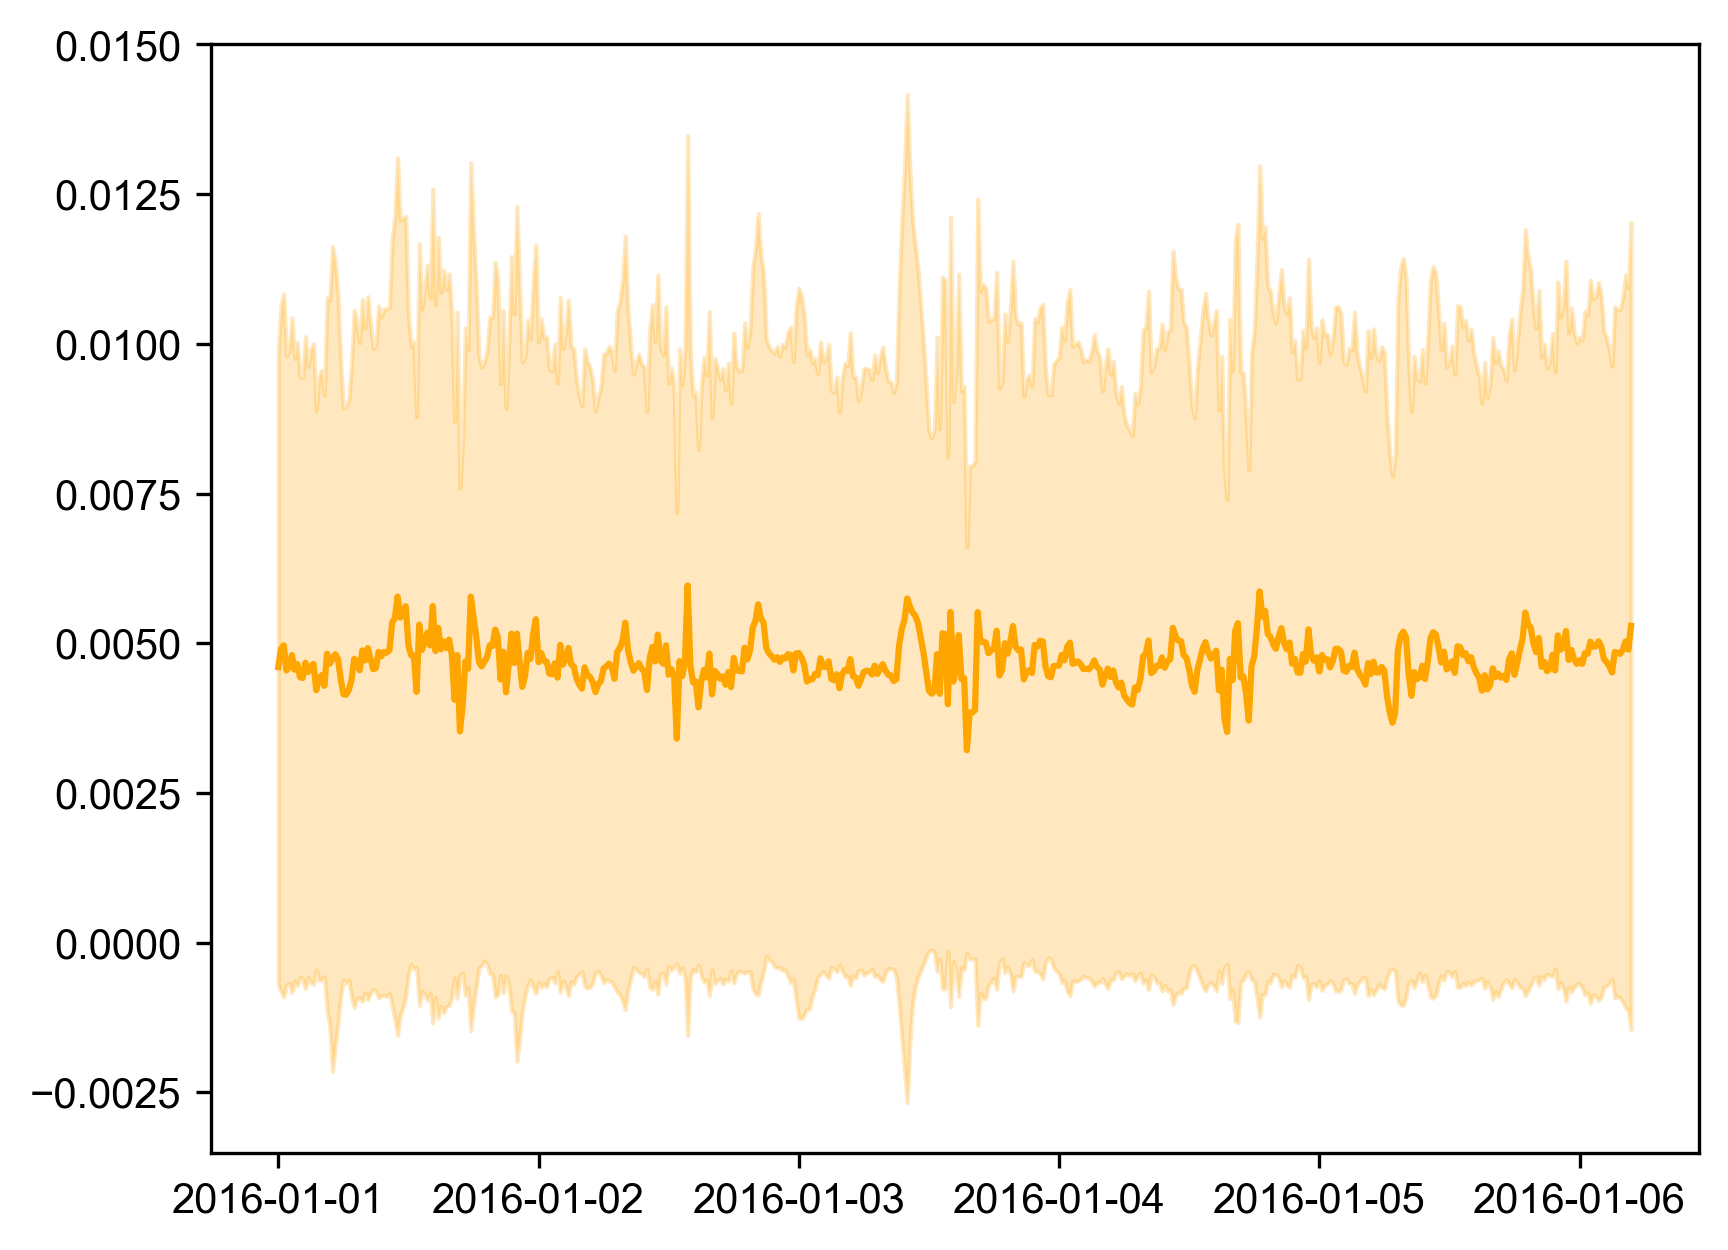

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rc('font',family='Arial')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
T = pd.date_range(start='2016-01-01', periods=500, freq='15T')
plt.fill_between(T, errorMean+errorStd, errorMean-errorStd, color='orange', alpha=0.25)
plt.plot(T,errorMean, color='orange')


In [11]:
e = abs(np.array(dataFromPF[ppRes.columns])[:500,:]-np.array(ppRes.iloc[i]))

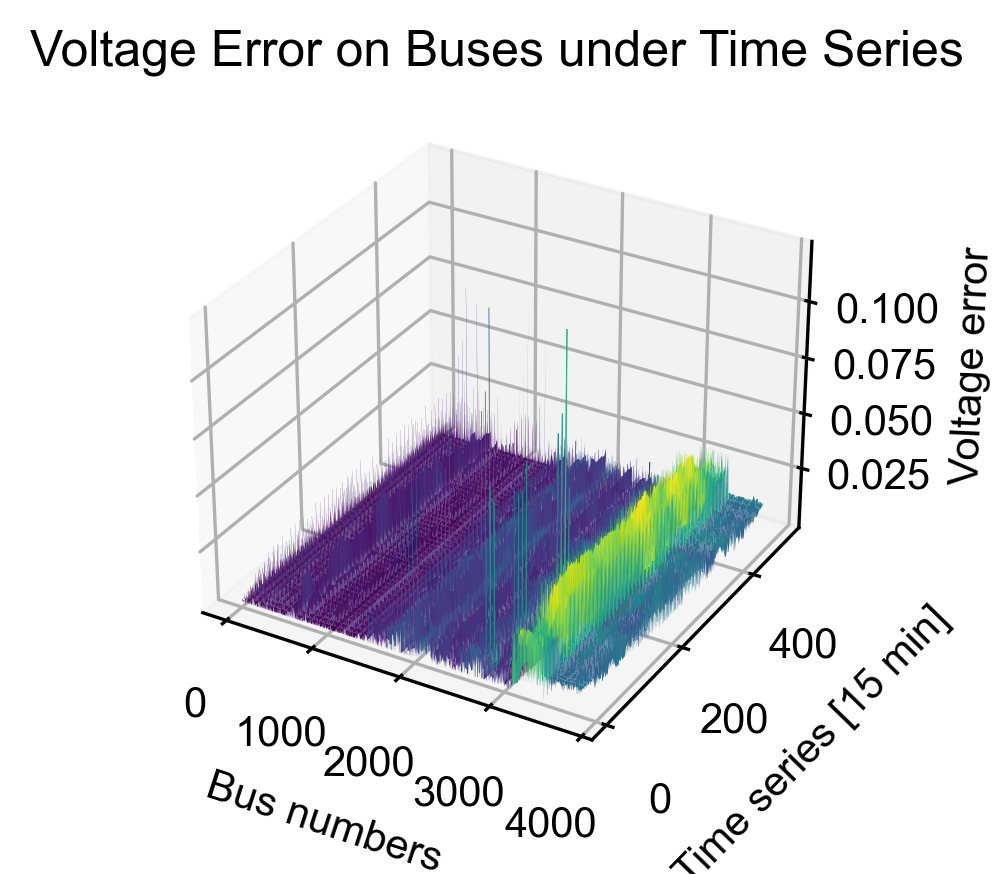

In [12]:
from mpl_toolkits.mplot3d import Axes3D

# 创建网格

# 绘制三维图
x = np.arange(e.shape[1])
y = np.arange(e.shape[0])
x, y = np.meshgrid(x, y)
z = e

# 绘制三维图
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')

# 添加标题和标签
ax.set_title('Voltage Error on Buses under Time Series')
ax.set_xlabel('Bus numbers')
ax.set_ylabel('Time series [15 min]')
ax.set_zlabel('Voltage error')

# 显示图形
plt.show()